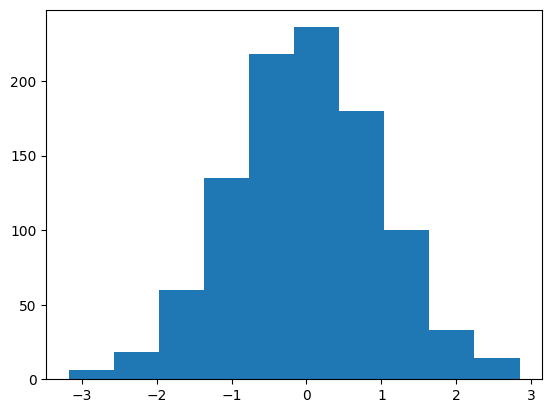

In [ ]:
# example of plotting a histogram of a random sample
from matplotlib import pyplot
from numpy.random import normal
# generate a sample
sample = normal(size=1000)
# plot a histogram of the sample
pyplot.hist(sample, bins=10)
pyplot.show()

**Parametric Density Estimation**

Once we have estimated the density, we can check if it is a good fit. This can be done in many ways, such as:

Plotting the density function and comparing the shape to the histogram.
Sampling the density function and comparing the generated sample to the real sample.
Using a statistical test to confirm the data fits the distribution.
We can demonstrate this with an example.

We can generate a random sample of 1,000 observations from a normal distribution with a mean of 50 and a standard deviation of 5.

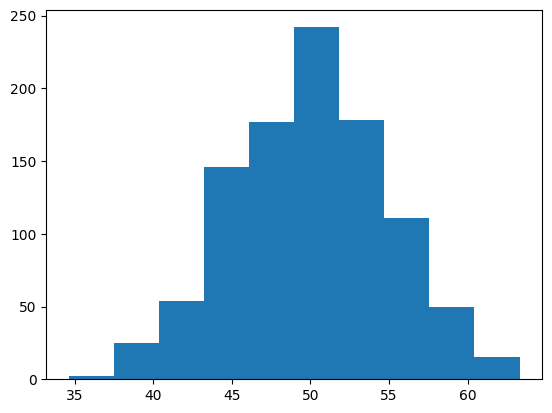

In [ ]:
# generate a sample
sample = normal(loc=50, scale=5, size=1000)

# plot a histogram of the sample
pyplot.hist(sample, bins=10)
pyplot.show()


We can then pretend that we don’t know the probability distribution and maybe look at a histogram and guess that it is normal. Assuming that it is normal, we can then calculate the parameters of the distribution, specifically the mean and standard deviation.

We would not expect the mean and standard deviation to be 50 and 5 exactly given the small sample size and noise in the sampling process.

In [ ]:
import numpy as np

# calculate parameters
sample_mean = np.mean(sample)
sample_std = np.std(sample)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))

Mean=50.003, Standard Deviation=4.866


Then fit the distribution with these parameters, so-called parametric density estimation of our data sample.

In this case, we can use the norm() SciPy function.

In [ ]:
import scipy as sp
# define the distribution
dist = sp.stats.norm(sample_mean, sample_std)

We can then sample the probabilities from this distribution for a range of values in our domain, in this case between 30 and 70.

In [ ]:
# sample probabilities for a range of outcomes
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]


Finally, we can plot a histogram of the data sample and overlay a line plot of the probabilities calculated for the range of values from the PDF.

Importantly, we can convert the counts or frequencies in each bin of the histogram to a normalized probability to ensure the y-axis of the histogram matches the y-axis of the line plot. This can be achieved by setting the “density” argument to “True” in the call to hist().

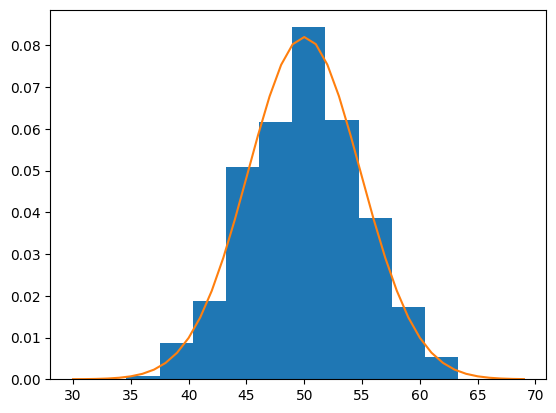

In [ ]:
# plot the histogram and pdf
pyplot.hist(sample, bins=10, density=True)
pyplot.plot(values, probabilities)

In this case, we can see that the mean and standard deviation have some noise and are slightly different from the expected values of 50 and 5 respectively. The noise is minor and the distribution is expected to still be a good fit.

It is possible that the data does match a common probability distribution, but requires a transformation before parametric density estimation.

For example, you may have outlier values that are far from the mean or center of mass of the distribution. This may have the effect of giving incorrect estimates of the distribution parameters and, in turn, causing a poor fit to the data. These outliers should be removed prior to estimating the distribution parameters.

Another example is the data may have a skew or be shifted left or right. In this case, you might need to transform the data prior to estimating the parameters, such as taking the log or square root.

These types of modifications to the data may not be obvious and effective parametric density estimation may require an iterative process of:

Loop Until Fit of Distribution to Data is Good Enough:
1. Estimating distribution parameters
2. Reviewing the resulting PDF against the data
3. Transforming the data to better fit the distribution

**Karnel Density Estimation**

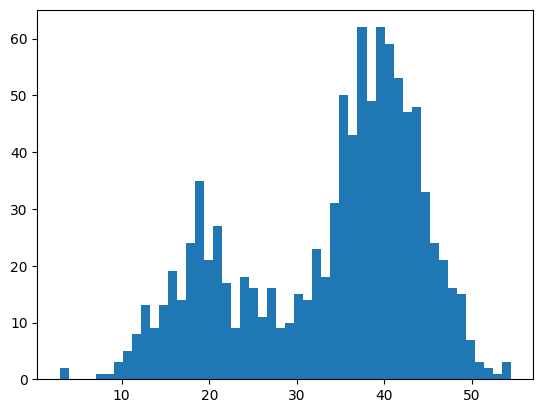

In [ ]:
# example of a bimodal data sample
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
# plot the histogram
pyplot.hist(sample, bins=50)
pyplot.show()

We have fewer samples with a mean of 20 than samples with a mean of 40, which we can see reflected in the histogram with a larger density of samples around 40 than around 20.

Data with this distribution does not nicely fit into a common probability distribution, by design. It is a good case for using a nonparametric kernel density estimation method.

The scikit-learn machine learning library provides the KernelDensity class that implements kernel density estimation.

First, the class is constructed with the desired bandwidth (window size) and kernel (basis function) arguments. It is a good idea to test different configurations on your data. In this case, we will try a bandwidth of 2 and a Gaussian kernel.

The class is then fit on a data sample via the fit() function. The function expects the data to have a 2D shape with the form [rows, columns], therefore we can reshape our data sample to have 1,000 rows and 1 column.

We can then evaluate how well the density estimate matches our data by calculating the probabilities for a range of observations and comparing the shape to the histogram, just like we did for the parametric case in the prior section.

The score_samples() function on the KernelDensity will calculate the log probability for an array of samples. We can create a range of samples from 1 to 60, about the range of our domain, calculate the log probabilities, then invert the log operation by calculating the exponent or exp() to return the values to the range 0-1 for normal probabilities.


Finally, we can create a histogram with normalized frequencies and an overlay line plot of values to estimated probabilities.

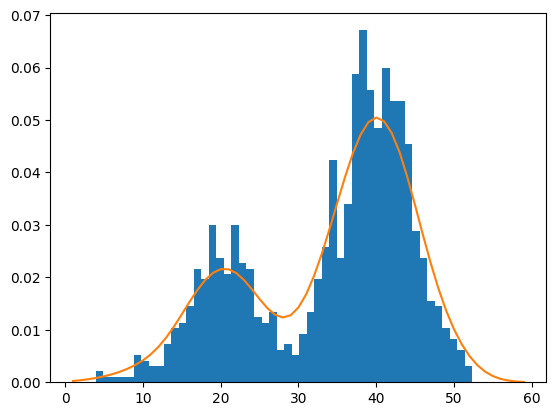

In [ ]:

# example of kernel density estimation for a bimodal data sample
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
# fit density
model = KernelDensity(bandwidth=3, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)
# sample probabilities for a range of outcomes
values = asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = exp(probabilities)
# plot the histogram and pdf
pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values[:], probabilities)
pyplot.show()